In [1]:
import requests
import json
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

rcParams['figure.figsize'] = (15, 9)
rcParams['font.size'] = 14

# All genes

In [3]:
headers = {'content-type': 'application/json'}
filters = {  
    "project_IDs": [
        "E-MTAB-7303"
    ],
    "cell_types": [
        "DopaminergicNeuron"
    ],
    "disease": [
        "ParkinsonsDisease",
        "Control"
    ]
}

response = requests.get('http://localhost:5001/percentiles', params={'filters': json.dumps(filters)}, headers=headers)
response

<Response [200]>

In [4]:
percentiles = response.json()
percentiles[0]

{'gene_name': 'ENSG00000000003',
 'metadata': {'cell type': 'DopaminergicNeuron',
  'developmental stage': 'Adult',
  'disease': 'ParkinsonsDisease',
  'organism': 'HomoSapiens',
  'organism part': 'Skin'},
 'number_cells': 37,
 'number_genes': 15892,
 'percentile': 58.51371759375786,
 'project_id': 'E-MTAB-7303'}

In [5]:
red_percentiles = [{'gene_name': percentil['gene_name'], 'percentile': percentil['percentile'], 'disease': percentil['metadata']['disease']} for percentil in percentiles]
red_percentiles[0]

{'gene_name': 'ENSG00000000003',
 'percentile': 58.51371759375786,
 'disease': 'ParkinsonsDisease'}

In [6]:
percentiles_PD = pd.DataFrame(red_percentiles)
percentiles_PD

,gene_name,percentile,disease
0,ENSG00000000003,58.513718,ParkinsonsDisease
1,ENSG00000000005,0.000000,ParkinsonsDisease
2,ENSG00000000419,27.529575,ParkinsonsDisease
3,ENSG00000000457,39.202114,ParkinsonsDisease
4,ENSG00000000460,26.000503,ParkinsonsDisease
...,...,...,...
34083,ENSG00000288550,25.758732,Control
34084,ENSG00000288556,1.461697,Control
34085,ENSG00000288558,1.990021,Control
34086,ENSG00000288564,41.138832,Control


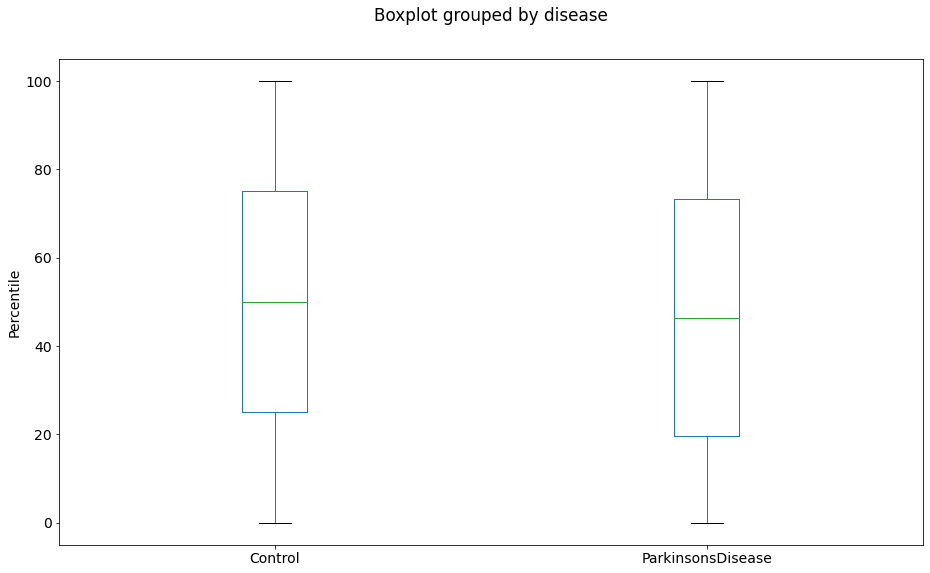

In [7]:
ax = percentiles_PD.boxplot(by='disease', grid=False)
ax.set_ylabel("Percentile")
ax.set_xlabel("")
ax.set_title("")
plt.show()

# High Evidence PD genes

In [8]:
PD_genes = pd.read_csv('Parkinson_Disease_and_Complex_Parkinsonism.csv')
PD_genes = PD_genes.drop(['Unnamed: 0'], axis=1)
PD_genes

,GeneSymbol,LevelOfConfidence,ModeOfInheritance,ModeOfPathogenicity
0,PRKN,HighEvidence,biallelic,NaN
1,ATP13A2,HighEvidence,biallelic,NaN
2,ATP1A3,HighEvidence,monoallelic,NaN
3,C19orf12,HighEvidence,biallelic,NaN
4,CSF1R,HighEvidence,monoallelic,NaN
5,DCTN1,HighEvidence,monoallelic,NaN
6,DNAJC6,HighEvidence,biallelic,NaN
7,FBXO7,HighEvidence,biallelic,NaN
8,FTL,HighEvidence,monoallelic,NaN
9,GBA,HighEvidence,monoallelic_and_biallelic,NaN


In [9]:
gene_dict = pd.read_csv('dictionary_genes.tsv', sep='\t')
gene_dict

,HGCN,ensembl
0,TSPAN6,ENSG00000000003
1,DPM1,ENSG00000000419
2,SCYL3,ENSG00000000457
3,C1orf112,ENSG00000000460
4,FGR,ENSG00000000938
...,...,...
16866,NOTCH2NLC,ENSG00000286219
16867,SPDYE11,ENSG00000286228
16868,H3C2,ENSG00000286522
16869,H3C3,ENSG00000287080


In [10]:
PD_genes_HighEvidence = PD_genes[PD_genes['LevelOfConfidence'] == "HighEvidence"]['GeneSymbol'].to_list()

In [11]:
PD_HighEvidence_gene_dict = gene_dict[gene_dict['HGCN'].isin(PD_genes_HighEvidence)]
PD_HighEvidence_gene_dict

,HGCN,ensembl
427,GRN,ENSG00000030582
946,VPS35,ENSG00000069329
1526,FTL,ENSG00000087086
1951,FBXO7,ENSG00000100225
2498,SPG11,ENSG00000104133
2552,SLC39A14,ENSG00000104635
2578,TUBB4A,ENSG00000104833
2688,ATP1A3,ENSG00000105409
3910,PARK7,ENSG00000116288
3942,DNAJC6,ENSG00000116675


In [12]:
def ensembl2HGCN(gene_name):
    return gene_dict[gene_dict['ensembl'] == gene_name]['HGCN'].iloc[0]

def HGCN2ensembl(gene_name):
    return gene_dict[gene_dict['HGCN'] == gene_name]['ensembl'].iloc[0]

In [13]:
HGCN2ensembl("DCTN1")

'ENSG00000204843'

In [14]:
print(f"We have {len(PD_genes_HighEvidence)} genes with high evidence in PD, {len(PD_HighEvidence_gene_dict)}/{len(PD_genes_HighEvidence)} in ensembl format.")

We have 34 genes with high evidence in PD, 31/34 in ensembl format.


In [15]:
PD_gene_HighEvidence_ensembl = PD_HighEvidence_gene_dict['ensembl'].to_list()
PD_gene_HighEvidence_ensembl

['ENSG00000030582',
 'ENSG00000069329',
 'ENSG00000087086',
 'ENSG00000100225',
 'ENSG00000104133',
 'ENSG00000104635',
 'ENSG00000104833',
 'ENSG00000105409',
 'ENSG00000116288',
 'ENSG00000116675',
 'ENSG00000125741',
 'ENSG00000125779',
 'ENSG00000131943',
 'ENSG00000131979',
 'ENSG00000143669',
 'ENSG00000145335',
 'ENSG00000155961',
 'ENSG00000158828',
 'ENSG00000159082',
 'ENSG00000159363',
 'ENSG00000177628',
 'ENSG00000180228',
 'ENSG00000182578',
 'ENSG00000184381',
 'ENSG00000185345',
 'ENSG00000186868',
 'ENSG00000188906',
 'ENSG00000196660',
 'ENSG00000196998',
 'ENSG00000197969',
 'ENSG00000204843']

In [16]:
headers = {'content-type': 'application/json'}
filters = {  
    "project_IDs": [
        "E-MTAB-7303"
    ],
    "gen_names":
        PD_gene_HighEvidence_ensembl
    ,
    "cell_types": [
        "DopaminergicNeuron"
    ],
    "disease": [
        "ParkinsonsDisease",
        "Control"
    ]
}

response = requests.get('http://localhost:5001/percentiles', params={'filters': json.dumps(filters)}, headers=headers)
response

<Response [200]>

In [17]:
percentiles = response.json()
percentiles[0]

{'gene_name': 'ENSG00000030582',
 'metadata': {'cell type': 'DopaminergicNeuron',
  'developmental stage': 'Adult',
  'disease': 'ParkinsonsDisease',
  'organism': 'HomoSapiens',
  'organism part': 'Skin'},
 'number_cells': 37,
 'number_genes': 15892,
 'percentile': 93.8963000251699,
 'project_id': 'E-MTAB-7303'}

In [18]:
red_percentiles = [{'gene_name': ensembl2HGCN(percentil['gene_name']), 'percentile': percentil['percentile'], 'disease': percentil['metadata']['disease']} for percentil in percentiles]
red_percentiles

[{'gene_name': 'GRN',
  'percentile': 93.8963000251699,
  'disease': 'ParkinsonsDisease'},
 {'gene_name': 'VPS35',
  'percentile': 83.79687893279637,
  'disease': 'ParkinsonsDisease'},
 {'gene_name': 'FTL',
  'percentile': 99.89302793858545,
  'disease': 'ParkinsonsDisease'},
 {'gene_name': 'FBXO7',
  'percentile': 94.41228290964007,
  'disease': 'ParkinsonsDisease'},
 {'gene_name': 'SPG11',
  'percentile': 82.45658192801409,
  'disease': 'ParkinsonsDisease'},
 {'gene_name': 'SLC39A14',
  'percentile': 30.43669770953939,
  'disease': 'ParkinsonsDisease'},
 {'gene_name': 'TUBB4A',
  'percentile': 74.93078278379059,
  'disease': 'ParkinsonsDisease'},
 {'gene_name': 'ATP1A3',
  'percentile': 49.068713818273345,
  'disease': 'ParkinsonsDisease'},
 {'gene_name': 'PARK7',
  'percentile': 98.03045557513215,
  'disease': 'ParkinsonsDisease'},
 {'gene_name': 'DNAJC6',
  'percentile': 87.31437201107475,
  'disease': 'ParkinsonsDisease'},
 {'gene_name': 'OPA3',
  'percentile': 60.514724389630004,

In [19]:
percentiles_PD = pd.DataFrame(red_percentiles)
percentiles_PD

,gene_name,percentile,disease
0,GRN,93.896300,ParkinsonsDisease
1,VPS35,83.796879,ParkinsonsDisease
2,FTL,99.893028,ParkinsonsDisease
3,FBXO7,94.412283,ParkinsonsDisease
4,SPG11,82.456582,ParkinsonsDisease
5,SLC39A14,30.436698,ParkinsonsDisease
6,TUBB4A,74.930783,ParkinsonsDisease
7,ATP1A3,49.068714,ParkinsonsDisease
8,PARK7,98.030456,ParkinsonsDisease
9,DNAJC6,87.314372,ParkinsonsDisease


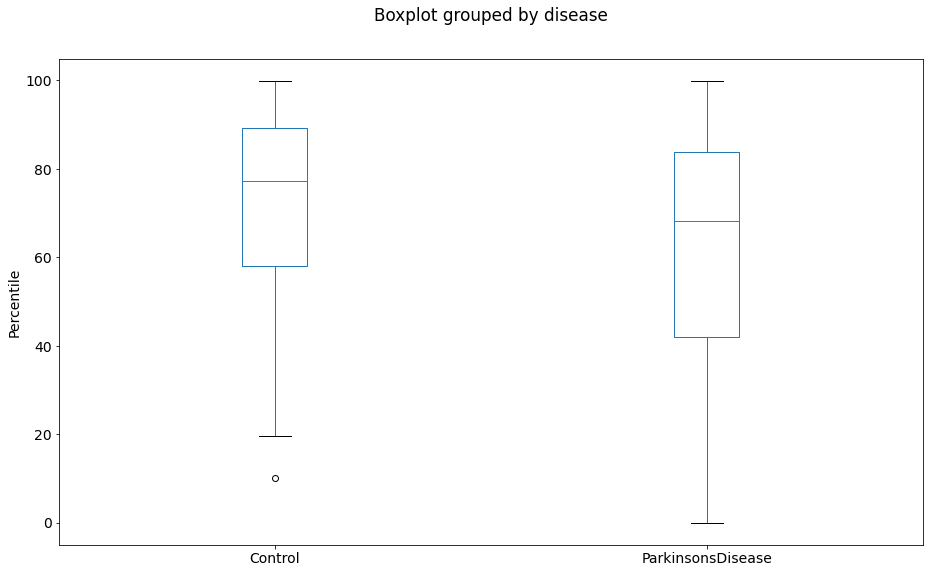

In [20]:
ax = percentiles_PD.boxplot(by='disease', grid=False)
ax.set_ylabel("Percentile")
ax.set_xlabel("")
ax.set_title("")
plt.show()

In [21]:
diff = [a - b for a, b in zip(percentiles_PD[percentiles_PD['disease']=='Control']['percentile'].to_list(),
                              percentiles_PD[percentiles_PD['disease']=='ParkinsonsDisease']['percentile'].to_list())]
diff

[-3.423743523849083,
 5.554456552968233,
 0.013047787860102744,
 -6.622438471718141,
 -5.26256960045319,
 5.16060196759592,
 1.9931972573012757,
 30.84323217526937,
 0.1849832273333618,
 5.189296905860971,
 -40.93738362062501,
 11.156175922138367,
 35.94834216668411,
 -18.74628795736055,
 -9.865984151460864,
 48.362400857978024,
 22.612460938455207,
 2.119952842827928,
 -22.91708207092917,
 14.966307282108446,
 6.414165517448225,
 22.654490307373422,
 -8.815143914998295,
 34.23109363607934,
 10.243452077572925,
 10.038156736131494,
 19.77656120403566,
 -9.218458081926798,
 3.7981318868608867]

In [29]:
diff_df = pd.DataFrame({
    'gene_name': percentiles_PD[percentiles_PD['disease']=='ParkinsonsDisease']['gene_name'].to_list(),
    'diff (control - PD)': diff
})
diff_df

,gene_name,diff (control - PD)
0,GRN,-3.423744
1,VPS35,5.554457
2,FTL,0.013048
3,FBXO7,-6.622438
4,SPG11,-5.262570
5,SLC39A14,5.160602
6,TUBB4A,1.993197
7,ATP1A3,30.843232
8,PARK7,0.184983
9,DNAJC6,5.189297


In [30]:
diff_df = diff_df.sort_values(by='diff (control - PD)', ascending=False)

<AxesSubplot:xlabel='gene_name'>

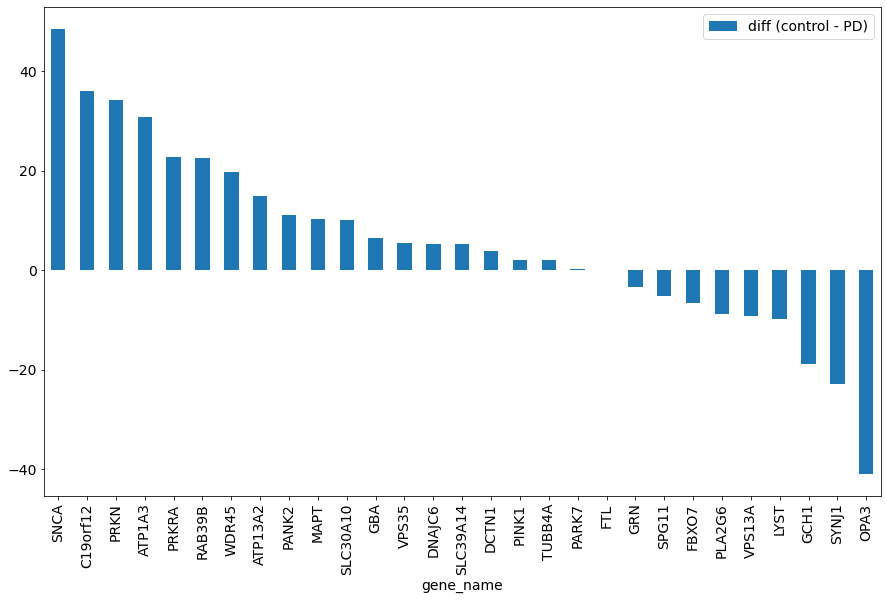

In [31]:
diff_df.plot.bar(x='gene_name', y = 'diff (control - PD)')